# DS for Business Project 1 - Human Resource (HR) Department

## Introduction:

The goal of this project is to develop a model that lowers the costs associated with hiring and training employees, this is done by focusing on the predicting which employees might leave the company. Within any organisation/company, the approach towards spending decisions every day plays a major role in company success and one of these decisions would be the important investment in people. The hiring process takes up a lot of skills, patience, time and money. 

The following outlines the most common hiring costs (https://toggl.com/blog/cost-of-hiring-an-employee):
1. External Hiring Teams.
2. Internal HR Teams.
3. Career Events.
4. Job boards fees.
5. Background Checks.
6. Onboarding and training.
7. Careers page.
8. Salary and extras.

As it can be seen from the lists above, it can be very difficult to pinpoint precisely the costs that are associated with hiring an employee. With all these rigorous processes already set up for a given company, perhaps there are better questions to ask, such as:
1. Which employee will stay and which will leave?
2. What are the factors that leads to an employee leaving the company and how it can be predicted?

## Breakdown of this Project:
1. Loading in the Dataset.
2. Visualise the data.
3. Dataset preparation (Data cleaning, training and testing splits)
4. Classifier models (Logistic Regression, Neural Networks, Random Forest)
5. Evaluation methodologies (Accuracy, Precision, Recall and F1-Scores)
6. Classifier Model training and its evaluation.

## Dataset:

Link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset Description (from source): Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists. 

What Is Attrition? \
Attrition in business describes a gradual but deliberate reduction in staff numbers that occurs as employees retire or resign and are not replaced. The term is also sometimes used to describe the loss of customers or clients as they mature beyond a product or company's target market without being replaced by a younger generation. (ref -> https://www.investopedia.com/terms/a/attrition.asp)

The following shows the dataset's columns:
- Education
- EnvironmentSatisfaction
- JobInvolvement
- JobSatisfaction
- PerformanceRating
- RelationshipSatisfaction
- WorkLifeBalance

## Requirements:
- Numpy
- Pandas
- Seaborn
- Matplotlib
- sk-learn
- os


## 1 - Setting up the Libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - Load in the Dataset:


In [2]:
# Dataset Filename:
dataset_fileName = 'Human_Resources.csv'

# Set up the Working Directory:
currentDirectory = os.getcwd()
path_to_dataset = currentDirectory + '/Dataset/' + dataset_fileName

In [3]:
# Load in the File: .csv format
employee_data_df = pd.read_csv(path_to_dataset)

### 2.1 - First glance at the dataset: 

Hhave a look at the first 10 rows.

In [4]:
employee_data_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Taking a look at the above, there is a column called "Attrition", this would be the column of interest that the model will predict. The remaining columns will therefore be used as predictor features.

Now, let's take a look at the last 10 row.

In [5]:
employee_data_df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### 2.2 - Dataset Statistics:

In [6]:
employee_data_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 2.3 - Dataset Column Description:

In [7]:
employee_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

__From the data source webpage, the details of the row data are broken down as such for the following columns__:

<img src="Description Images/Column_details.PNG" width="550">

Image Ref -> Self-made


## 3 - Exploratory Data Analysis (EDA) and Data Cleaning:

Exploratory Data Analysis (EDA) is performed to mainly summarise the main characteristices of a dataset. These often employ visual methods, which shows preliminary results what the data can offer before the modeling task.

Exploratory Data Analysis (EDA) are typically used for the following:
- Detection of mistakes
- Checking of assumptions
- Preliminary selection of appropriate models
- Determining relationships among the explanatory variables, and
- Assessing the direction and rough size of relationships between explanatory and outcome variables.

In this section, the dataset will also go through the data cleaning process. Just to recap, this is where the data is prepared for analysis, by removing/modifying data (individual samples, rows or entire columns) that are incorrect, incomplete, irrelevent, duplicated or poorly formatted. This will ensure that the data which remains can be used to build a better model with greater predictive power. (In other words, to maximize a dataset’s accuracy without necessarily deleting information.)

The following diagram outlines the process for Data Cleaning:

<img src="Description Images/data_cleaning_cycle.jpg" width="550">

Image Ref -> https://www.iteratorshq.com/blog/data-cleaning-in-5-easy-steps/

The work done in this section will follow the steps outline above as much as possible, as different datasets will involve a varying degree of cleaning. The end goal of this section would be to define what will be needed so that a Pipeline can be designed to process the data for the modeling task, as well as exploring the characteristics of the dataset.

### 3.1 - Inspect the dataset for potential columns to clean:

In [8]:
employee_data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 3.1.1 - Encoding the Category of the Feature:

This is where columns that contains ordinal values will be encoded to numerical values so that the model can understand and use these information.

Columns of Interests:
1. Attrition.
2. Overtime.
3. Over18.

In [9]:
# Import the required library:
from sklearn.base import TransformerMixin

In [10]:
# List the columns in the dataset:
employee_data_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Define the Custom category encoding Class:

class CustomCategoryEncoder(TransformerMixin):
    """ This builds the Custom Category Encoder, that inherits the TransformerMixin class.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - dataFrame, is the input Dataset (DataFrame)
        - cols, are the List of columns of interest for this transformation.
        - ordering, is the ordering of the Ordinal Values.
    Returns:
        - returns the Encoded Columns.
    Notes:
        - This class will convert "Yes" and "No" row values into 1 or 0.
        - It will also check if the row values are in abbreviated format or not. 
            (i.e "Yes" or "Y", "No" or "N")
    """
    # Initialise the instance attributes, the columns and ordering:
    def __init__(self, cols=None, ordering=None):
        self.cols = cols
        self.ordering = ordering
    
    # Transform the dataset's ordinal values:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        for col in self.cols:
        
            # Find the ordering of the Ordinal Values:
            if self.ordering is not None:
                ordering_to_encode_with = self.ordering
            else:
                ordering_to_encode_with = list( X[col].unique() )
            
            print("Column to Encode -> {} | Unique values are: {}".format(col, ordering_to_encode_with))
        
            # Encode:
            X[col] = X[col].map(lambda x: ordering_to_encode_with.index(x))
        
        return X
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self
    

#### Apply the function:

In [12]:
columns_of_interest = ['Attrition', 'Over18', 'OverTime']
# columns_of_interest = ['Attrition']

# Apply the custom encoder, instantiate:
cc_encoder = CustomCategoryEncoder(cols=columns_of_interest)

# Fit and transform on the dataset:
employee_data_df = cc_encoder.fit_transform(X=employee_data_df)
employee_data_df

Column to Encode -> Attrition | Unique values are: ['Yes', 'No']
Column to Encode -> Over18 | Unique values are: ['Y']
Column to Encode -> OverTime | Unique values are: ['Yes', 'No']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### 3.1.2 - Impute the Missing Values:

Let's first check if the dataset have any missing values.

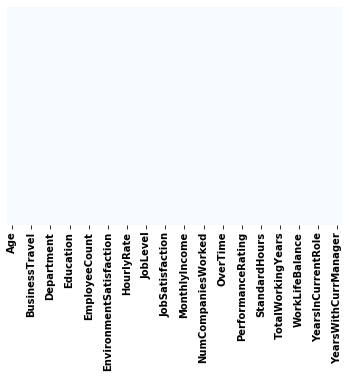

In [13]:
sns.heatmap(data=employee_data_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

From the output plot, it shows that there are no missing data (Uniform blue colour).

### 3.1.3 - Drop columns (features) that are not informative:

During the examination of the columns (features) of this dataset, the following columns were found to be uninformative:
- EmployeeCount (assigned a value of 1 for each employee)
- Over18 (Everyone is above 18 years of age)
- StandardHours (standard working hours of 80 for everyone)

These were found by simply going through the column headers in Excel (faster to perform), and setting up the filter feature, these columns presented with only a single value that does not provide any valuable information that can be used for modelling.

Thereforem, let's drop these columns to simplify the dataset.

In [14]:
# list the columns to drop:
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']

# Drop these columns:
employee_data_df.drop(labels=columns_to_drop, axis=1, inplace=True)

In [15]:
# Inspect:
len(employee_data_df.columns)

32

As it can be seen, the column count has dropped from 35 columns to 32 columns.

### 3.2 - Inspect the Target Variable: Attrition Column.

The target variable would be the value that the model will try to predict, where in this case, this would be the "Attrition" column. Here, it is a binary pair consisting of "0 for Yes" (where the employee has left the company) and "1 for No" (where the employee has stayed wihtin the company).

### 3.2.1 - Examine how many employees stayed or left:

In [16]:
# Employees that Left the company:
employee_left_df = employee_data_df[ employee_data_df['Attrition'] == 0 ]

# Employees that Stayed at the company:
employee_stayed_df = employee_data_df[ employee_data_df['Attrition'] == 1 ]

# Define the total number of employees:
employee_totalCount = len(employee_data_df)

In [20]:
# Find the number of employees that Left:
print('Number of employees that left the company = {}'.format(len(employee_left_df)))

# Find the number of employees that Stayed:
print('Number of employees that stayed with the company = {}'.format(len(employee_stayed_df)))

# Find the percentages: left and Stayed:
print("% of employees that left: {}%".format( round((len(employee_left_df) / employee_totalCount) * 100 , ndigits=3) ))
print("% of employees that stayed: {}%".format( round((len(employee_stayed_df) / employee_totalCount) * 100 , ndigits=3) ))

Number of employees that left the company = 237
Number of employees that stayed with the company = 1233
% of employees that left: 16.122%
% of employees that stayed: 83.878%


An important thing to note here, is that the dataset can be seen to be imbalance, meaning that the target variables are not represented equally. This would also directly influence the accuracy scores negatively, and therefore the F1-score should be used.

### 3.2.1 - Target Variable Statistics:

In [21]:
# For employees that left:
employee_left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,0.0,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,580.750572,1.169791,20.099958,0.773405,0.940594,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,0.0,103.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.0,408.000000,3.000000,2.000000,514.000000,1.000000,50.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,0.0,699.000000,9.000000,3.000000,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,0.0,1092.000000,17.000000,4.000000,1486.000000,4.000000,84.000000,3.000000,2.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,0.0,1496.000000,29.000000,5.000000,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [22]:
# For employees that stayed:
employee_stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,1.0,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,606.217074,1.071132,20.380754,0.692050,1.117933,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,1.0,102.000000,1.000000,1.000000,2.000000,1.000000,30.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.0,477.000000,2.000000,2.000000,483.000000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,1.0,817.000000,7.000000,3.000000,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1.0,1176.000000,13.000000,4.000000,1574.000000,4.000000,83.000000,3.000000,3.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1.0,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Observation:

- From the above, the __mean age__ for the employees that stayed is around __37 to 38 years old__, whereas the employess that left, the __mean age__ is around __33 to 34 years old__. 

- It can also be seen that employees that stayed are also getting a higher pay (mean DailyRate = USD 812.50). 

- Employees that stayed also live closer to their workplace.

- Employees that stayed have a higher mean StockOptionLevel at 0.845 vs. those that left as 0.527.

Based on what was observed above, it would be better to visualise these with a correlation chart to provide an overall study.

### 3.2.2 - Correlations:

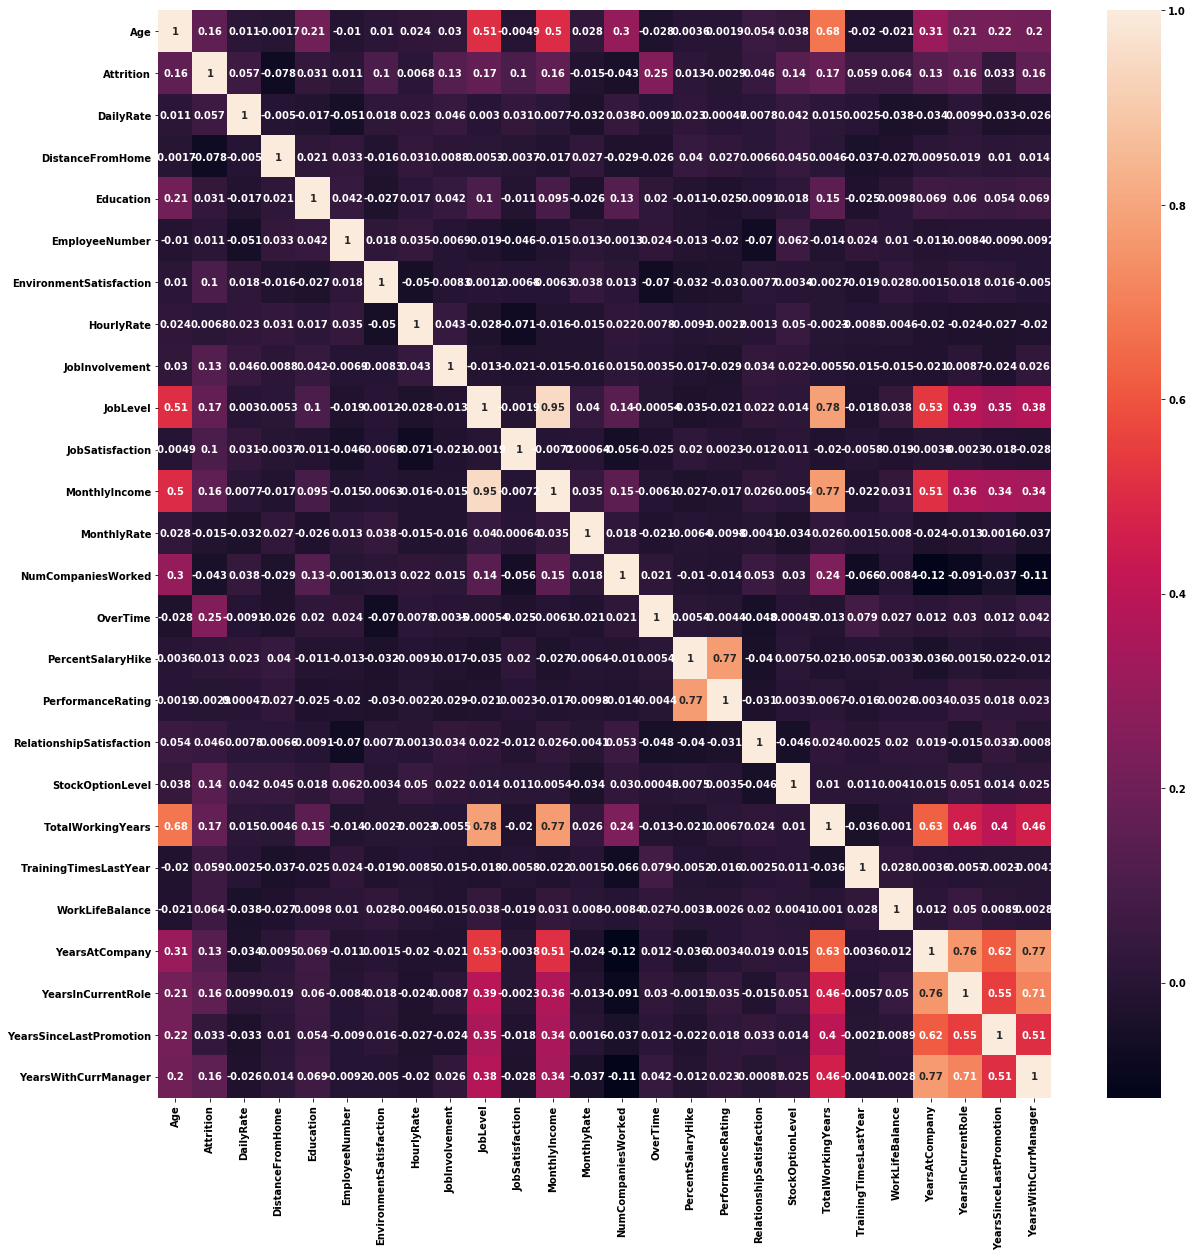

In [23]:
# Instantiate a correlation matrix for plotting:
correlations_employee = employee_data_df.corr()

# Plot with HeatMap:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=correlations_employee, annot=True)

### Observation:

From the heatmap key on the right, it shows the lighter the heatmap colour, the better correlated the features are to each other.

Observed outcomes examples:
- There is a strong correlation between the TotalWorkingYears and JobLevel and MonthlyIncome.
- There is a strong correlation between PerformanceRating and PercentSalaryHike.
- There is a good correlation between YearsAtCompany between JobLevel and MonthlyIncome.
- There is a strong correlation between YearsInCurrentRole and YearsAtCompany.
- There is a strong correlation between YearsWithCurrManager and YearsAtCompany and YearsInCurrentRole.
- A strong correlation between MonthlyIncome and JobLevel.

### 3.2.3 - Visualise the relationship between: Age and Attrition.

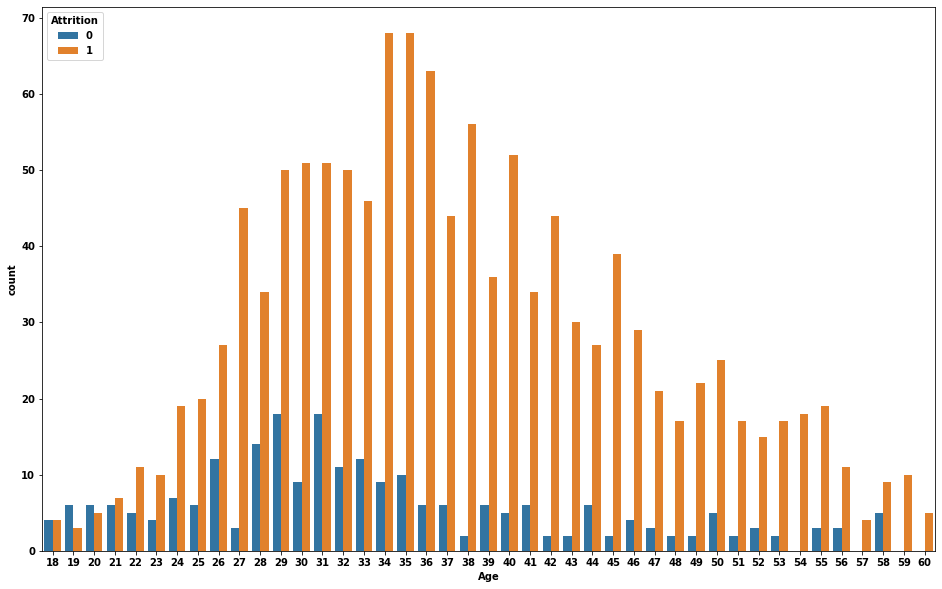

In [24]:
plt.figure(figsize=(16, 10))
sns.countplot(x= "Age", hue='Attrition', data=employee_data_df)

### Observation:

Keys:
- "0" are the employees that Left (Blue Bars)
- "1" are the employees that stayed (Orange Bars)

It can be seen that around 20 employees around the age of 29 years old would leave the company while 50 employees in the same age would stay with the company. On the other hand, as the age of the employees increases, they are less likely to leave the company, for example, no one left at the age above 59 years old. 

### 3.2.4 -  Visualise the relationship between: 

- Attrition and JobRole
- Attrition and MaritalStatus
- Attrition and JobInvolvement
- Attrition and JobLevel

Plot keys: "0" are the employees that Left (Blue Bars) | "1" are the employees that stayed (Orange Bars)
Plot for relationship between Attrition and JobRole:


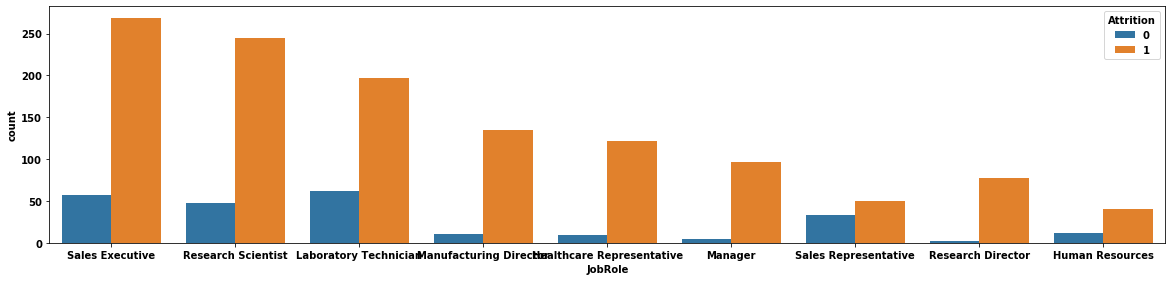

Plot for relationship between Attrition and MaritalStatus:


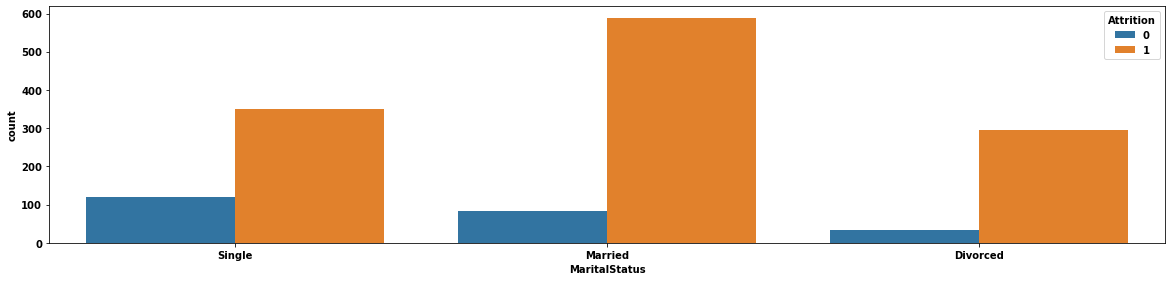

Plot for relationship between Attrition and JobInvolvement:


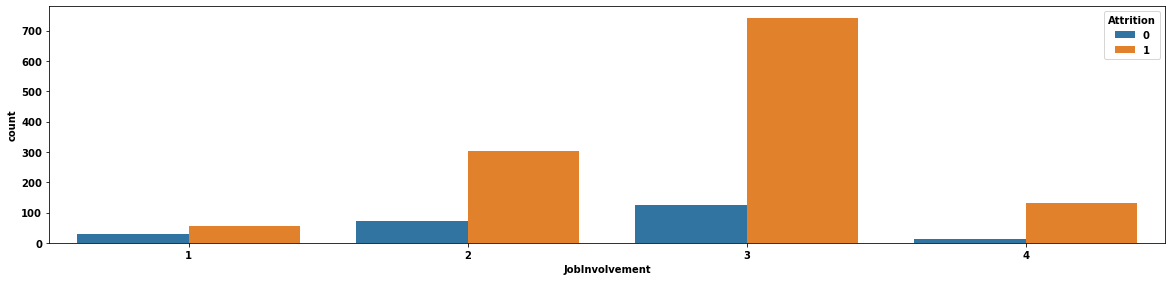

Plot for relationship between Attrition and JobLevel:


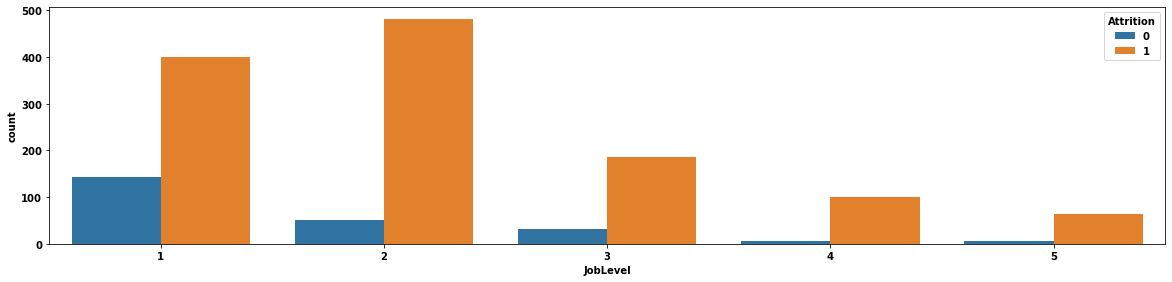

In [45]:
# Define the Columns of interest to be compared with the Attrition Column:
columns_of_interest = ['JobRole', 'MaritalStatus', 'JobInvolvement', 'JobLevel']

plot_key_1 = '"0" are the employees that Left (Blue Bars) | "1" are the employees that stayed (Orange Bars)'

print("Plot keys: {}".format(plot_key_1))

# Plot:
for idx, col in enumerate(columns_of_interest):
    plt.figure(figsize=[20, 20])
    print("Plot for relationship between Attrition and {}:".format(col))
    position_plot = 410 + (idx+1)
    plt.subplot(position_plot)
    sns.countplot(x=col, hue='Attrition', data=employee_data_df)
    plt.show()
    

### Observations:

For the 1st plot (Attrition and JobRole):
- There is a higher turnover rate for the job role of Sales Representatives.
- There are lower turnover rates for the job roles of Research Director, Managers, Manufacturing Directors etc.

For the 2nd plot (Attrition and MaritalStatus):
- Single employees were seen to leave the company more often than the others.

For the 3rd plot (Attrition and JobInvolvement):
- In terms of percentage of the employees that left, it seems that this happens with both JobInvolvement of 2 and 3.

For the 4th plot (Attrition and JobLevel):
- Lower job level employees (level 1) tend to leave more often compared with the rest. With more job experience, the employees tend to stay longer.


### 3.2.5 - 

In [ ]:
break

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D9C77FBC8>,
      dtype=object)

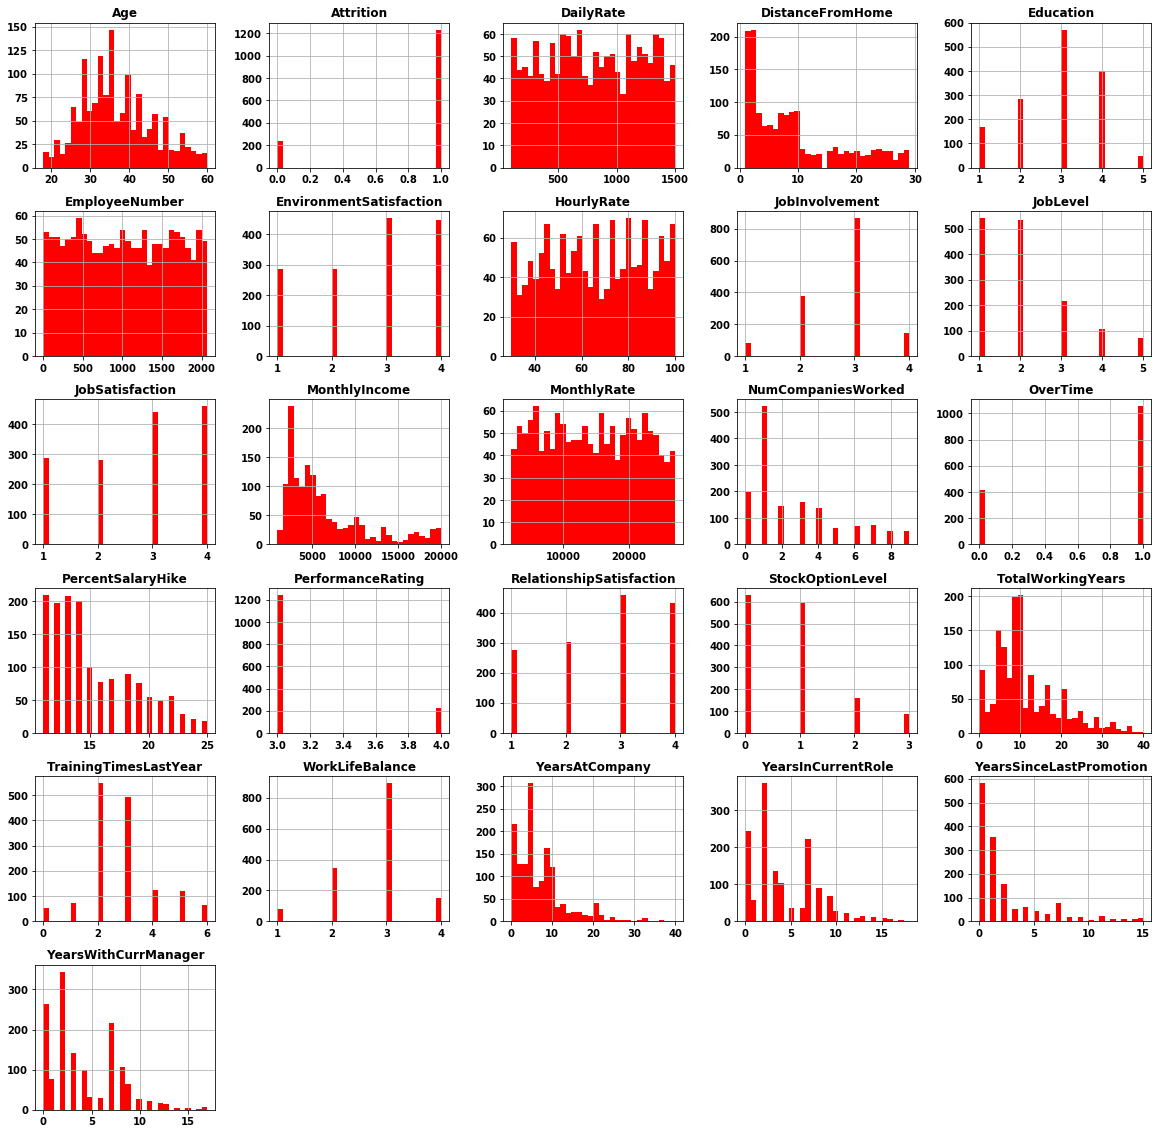

In [18]:
employee_data_df.hist(bins=30, figsize=(20,20), color="Red" )

# Plots numbers only. not string values.
# Complete Pipeline first.

In [19]:
break

SyntaxError: 'break' outside loop (<ipython-input-19-6aaf1f276005>, line 4)

In [ ]:
<img src="Description Images/.png" width="750">

Image Ref -> 